In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
def plot_quantiles(data, cat_column, num_column):
    
    """
    PLots 1st and 3rd quantiles.
    """
    
    from warnings import filterwarnings
    filterwarnings("ignore")
    
    order = np.array(data.groupby(cat_column)[num_column].quantile(0.75).index)
        
    
    plt.figure(figsize=(20,20))
    
    plt.subplot(4,1,1)
    data.groupby(cat_column)[num_column].quantile(0.75).plot()
    plt.xlabel("Quantile 3")
    
    
    plt.subplot(4,1,2)
    data.groupby(cat_column)[num_column].quantile(0.25).plot()
    plt.xlabel("Quantile 1")
    
    plt.subplot(4,1,3)
    data.groupby(cat_column)[num_column].median.plot(color = 'g')
    plt.xlabel("Median")
    
    plt.subplot(4,1,4)
    sns.boxplot(data = data, x = cat_column, y=num_column, order = order) 
    
def percentage_error(dataframe,pred, true_value):
    
    '''
    dataframe: Pass in pandas dataframe variable
    pred = 'Predictions' #model.predict(x_test).reshape()
    true_value = 'True Values' #y_test
    
    '''
    
    difference = dataframe[true_value] - dataframe[pred]
    
    dataframe['Error(%)']= np.absolute(difference/dataframe[true_value]*100)
    
    print('median \t {}'.format(dataframe['Error(%)'].median()))    
    print(dataframe['Error(%)'].describe())
    
def adjusted_r_squared(r2, data):
    
    x = (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-x

In [56]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Desktop\\TicketOptimization\\SummerProducts.csv')
df.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [249]:
df.iloc[:, 20:30].head(2)

,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country
0,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN
1,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN


In [247]:
df.isnull().sum()[20:30], 

(product_variation_size_id        14
 product_variation_inventory       0
 shipping_option_name              0
 shipping_option_price             0
 shipping_is_express               0
 countries_shipped_to              0
 inventory_total                   0
 has_urgency_banner             1100
 urgency_text                   1100
 origin_country                   17
 dtype: int64,)

In [248]:
df.dtypes[20:30]

product_variation_size_id       object
product_variation_inventory      int64
shipping_option_name            object
shipping_option_price            int64
shipping_is_express              int64
countries_shipped_to             int64
inventory_total                  int64
has_urgency_banner             float64
urgency_text                    object
origin_country                  object
dtype: object

In [250]:
df['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [197]:
df['product_color'] = df['product_color'].replace('leopard', 'multicolor')

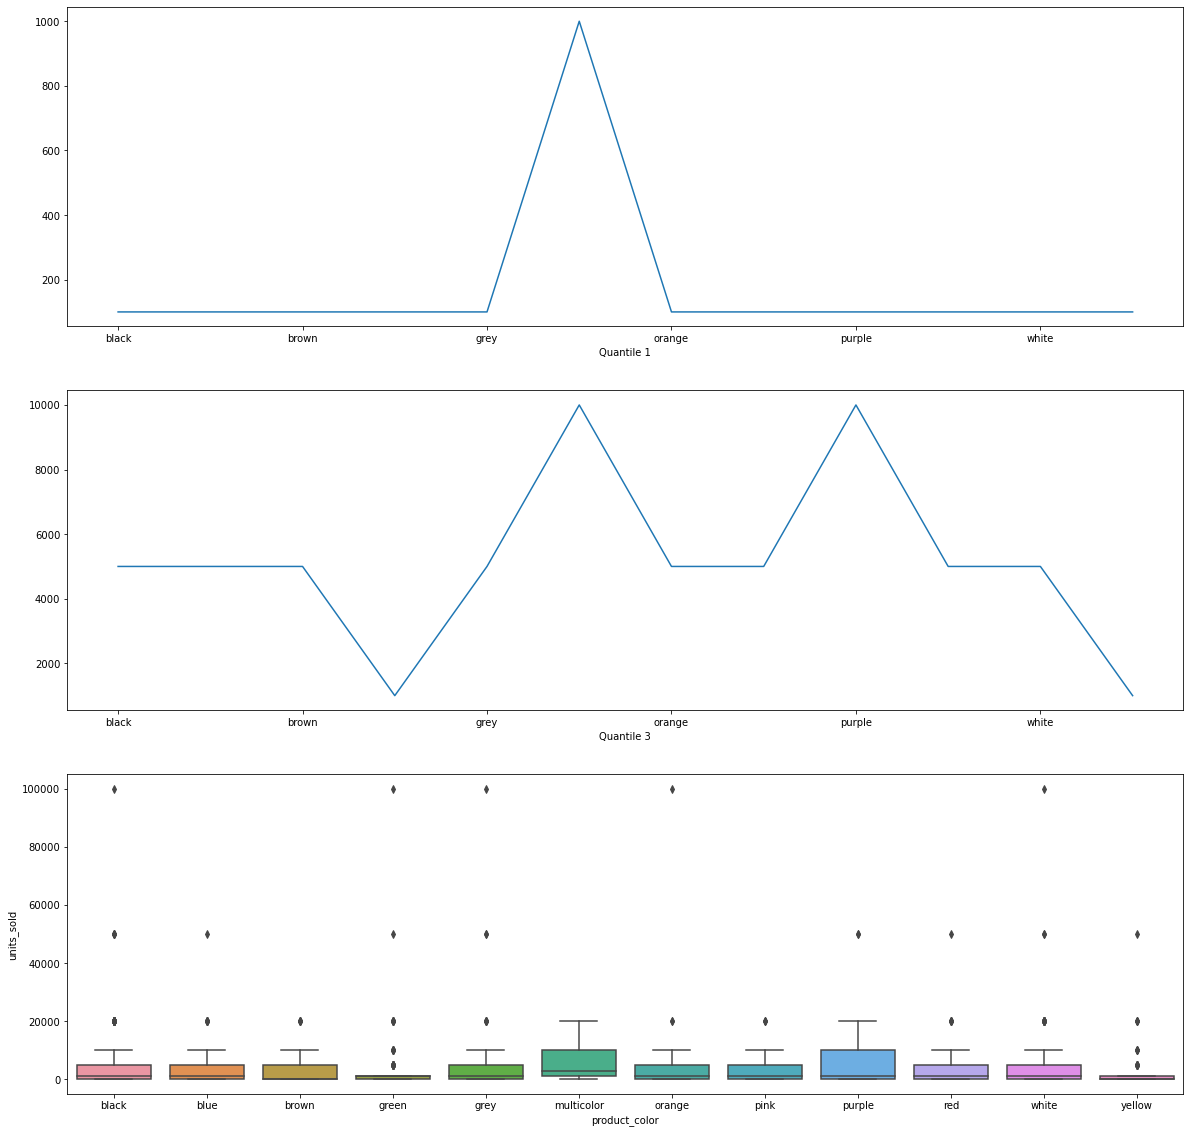

In [232]:
plot_quantiles(df,'product_color', 'units_sold' )

In [ ]:
drops = ['title_orig',
'currency_buyer',
'rating_four_count',
'rating_count',
'rating_one_count',
'rating_two_count',
'rating_three_count'
'rating_five_count']

nlp = ['title', 'tags']


numerical = ['units_sold',
'price'
'retail_price',
'uses_ad_boosts',
'badges_count',
'badge_local_product',
'badge_product_quality',
'badge_fast_shipping']

categorical = ['product_color',
              ]



<AxesSubplot:>

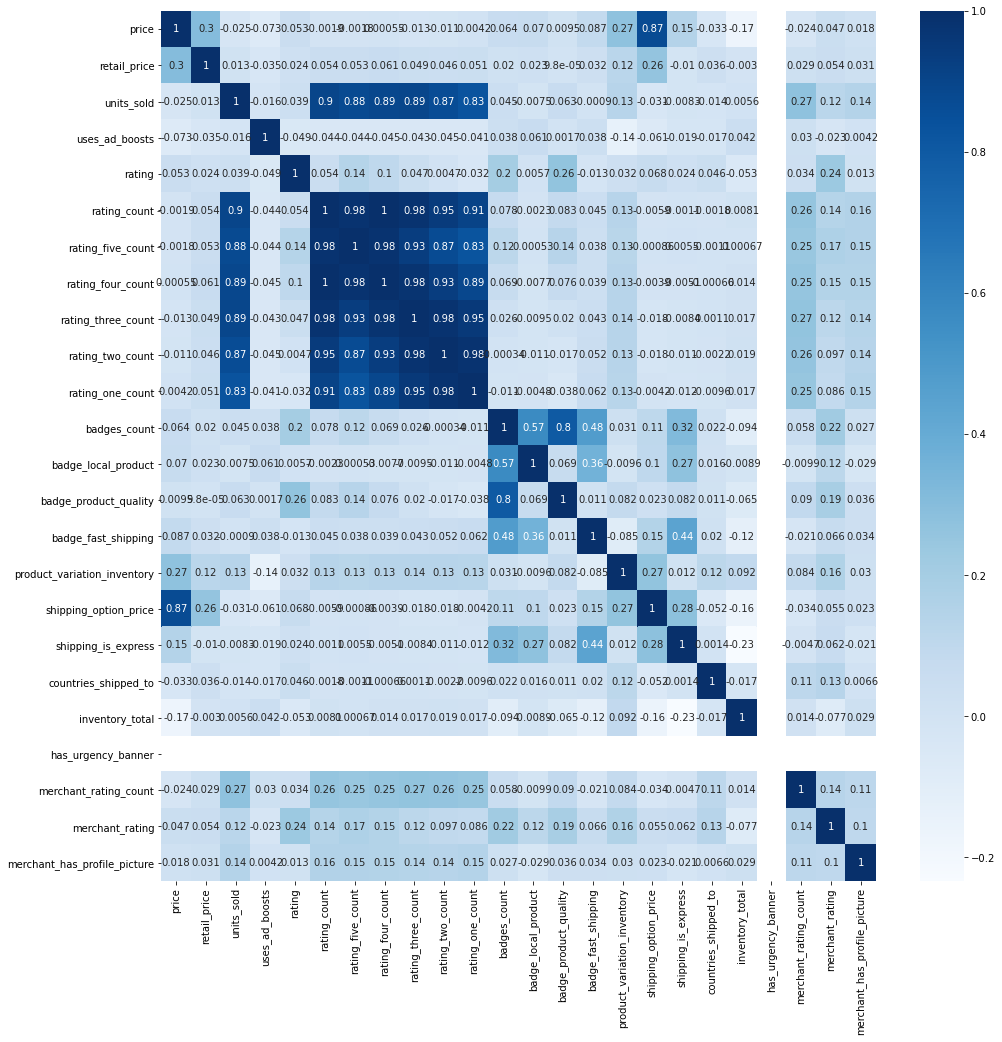

In [54]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap ='Blues')

In [3]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [4]:
cols = ['price', 
       'units_sold', 'uses_ad_boosts', 'rating', 
       'tags',]

df_cols = df[cols]

In [5]:
df_cols.head()

,price,units_sold,uses_ad_boosts,rating,tags
0,16.00,100,0,3.76,"Summer,Fashion,womenunderwearsuit,printedpajam..."
1,8.00,20000,1,3.45,"Mini,womens dresses,Summer,Patchwork,fashion d..."
2,8.00,100,0,3.57,"Summer,cardigan,women beachwear,chiffon,Sexy w..."
3,8.00,5000,1,4.03,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri..."
4,2.72,100,1,3.10,"Summer,Plus Size,Lace,Casual pants,Bottom,pant..."


In [6]:
tags = df_cols['tags']
df_cols.drop('tags', inplace=True, axis =1)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
X = df_cols.drop('units_sold', axis = 1)
y = df_cols['units_sold']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
T = tags

In [10]:
from sklearn.model_selection import train_test_split
X_trainT,  X_testT,  = train_test_split(T, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_trainT)

In [13]:
train_sequences = tokenizer.texts_to_sequences(X_trainT)
test_sequences = tokenizer.texts_to_sequences(X_testT)

In [14]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Total number of unique tokens are: {V}")

Total number of unique tokens are: 1859


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences)
sequence_length = train_data.shape[1]

In [16]:
test_data = pad_sequences(test_sequences, maxlen=sequence_length)

In [17]:
train_data.shape, test_data.shape, X_train.shape, X_test.shape

((1258, 58), (315, 58), (1258, 3), (315, 3))

# Dimentionality Reduction

In [18]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel = 'rbf')
train_data = kpca.fit_transform(train_data)
test_data = kpca.transform(test_data)

In [19]:
train_data.shape, test_data.shape, X_train.shape, X_test.shape

((1258, 3), (315, 3), (1258, 3), (315, 3))

In [20]:
X_train = np.concatenate((X_train,train_data), axis = 1)
X_test = np.concatenate((X_test, test_data), axis = 1)

In [21]:
train_data.shape, test_data.shape, X_train.shape, X_test.shape

((1258, 3), (315, 3), (1258, 6), (315, 6))

In [22]:
y_train.shape, y_test.shape

((1258,), (315,))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential([Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(1)])

model.compile(optimizer='adam', loss= 'mse')

In [26]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
result = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=28, epochs = 200, verbose = 1);

Train on 1258 samples, validate on 315 samples
Epoch 1/200
1258/1258 [==============================] - 2s 2ms/sample - loss: 98625783.4070 - val_loss: 137006080.0000
Epoch 2/200
1258/1258 [==============================] - 0s 184us/sample - loss: 98610687.2321 - val_loss: 136976249.4222
Epoch 3/200
1258/1258 [==============================] - 0s 248us/sample - loss: 98569034.4706 - val_loss: 136892221.5111
Epoch 4/200
1258/1258 [==============================] - 0s 167us/sample - loss: 98453419.5135 - val_loss: 136666268.0889
Epoch 5/200
1258/1258 [==============================] - 0s 132us/sample - loss: 98156463.6693 - val_loss: 136126936.3556
Epoch 6/200
1258/1258 [==============================] - 0s 141us/sample - loss: 97506021.6423 - val_loss: 135002788.0889
Epoch 7/200
1258/1258 [==============================] - 0s 139us/sample - loss: 96243630.9921 - val_loss: 133066516.0889
Epoch 8/200
1258/1258 [==============================] - 0s 136us/sample - loss: 94288703.0207 - val_

1258/1258 [==============================] - 0s 177us/sample - loss: 81043383.4658 - val_loss: 112706028.6222
Epoch 62/200
1258/1258 [==============================] - 0s 172us/sample - loss: 81028107.2242 - val_loss: 112667943.9111
Epoch 63/200
1258/1258 [==============================] - 0s 172us/sample - loss: 81036477.4976 - val_loss: 112674410.0444
Epoch 64/200
1258/1258 [==============================] - 1s 456us/sample - loss: 81026935.2846 - val_loss: 112677425.6000
Epoch 65/200
1258/1258 [==============================] - 0s 195us/sample - loss: 81028806.9475 - val_loss: 112728695.4667
Epoch 66/200
1258/1258 [==============================] - 0s 156us/sample - loss: 81018672.5469 - val_loss: 112620068.1778
Epoch 67/200
1258/1258 [==============================] - 0s 152us/sample - loss: 81020811.7234 - val_loss: 112651859.2889
Epoch 68/200
1258/1258 [==============================] - 0s 156us/sample - loss: 81008230.6773 - val_loss: 112657261.9556
Epoch 69/200
1258/1258 [=====

1258/1258 [==============================] - 0s 233us/sample - loss: 80834230.7949 - val_loss: 112106465.1556
Epoch 194/200
1258/1258 [==============================] - 0s 211us/sample - loss: 80818004.6455 - val_loss: 112112238.6667
Epoch 195/200
1258/1258 [==============================] - 0s 149us/sample - loss: 80829212.9730 - val_loss: 112103073.2444
Epoch 196/200
1258/1258 [==============================] - 0s 186us/sample - loss: 80820963.3545 - val_loss: 112123686.1333
Epoch 197/200
1258/1258 [==============================] - 0s 181us/sample - loss: 80813590.5882 - val_loss: 112150310.3111
Epoch 198/200
1258/1258 [==============================] - 0s 178us/sample - loss: 80812053.0397 - val_loss: 112187582.2222
Epoch 199/200
1258/1258 [==============================] - 0s 191us/sample - loss: 80815302.5151 - val_loss: 112175191.2889
Epoch 200/200
1258/1258 [==============================] - 0s 205us/sample - loss: 80824943.3514 - val_loss: 112072765.1556


<AxesSubplot:>

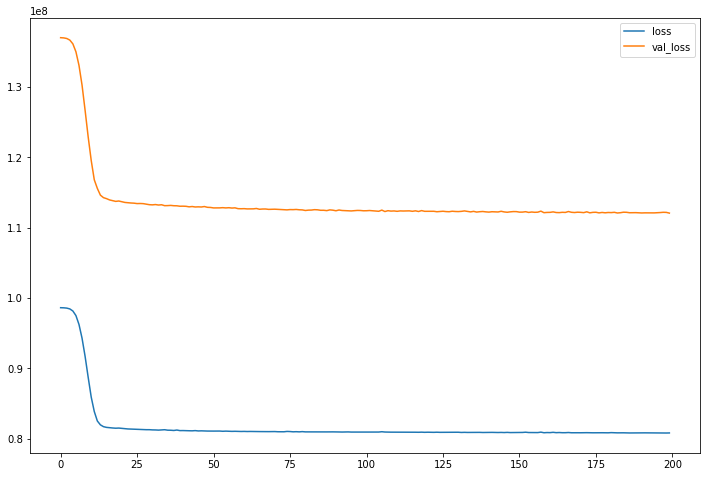

In [254]:
losses = pd.DataFrame(result.history)
losses.plot(figsize=(12,8))

In [256]:
y_pred = model.predict(X_test)

In [257]:
test = pd.DataFrame()
test['TrueValues'] = y_test
test['Predictions'] = y_pred

In [258]:
percentage_error(test,'Predictions', 'TrueValues')

median 	 332.2140625
count      315.000000
mean      3740.531737
std      10206.823596
min          5.723640
25%         58.956357
50%        332.214063
75%       4036.091064
max      83304.207357
Name: Error(%), dtype: float64


In [259]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, explained_variance_score
mean_absolute_error(y_test, y_pred), median_absolute_error(y_test, y_pred)

(5569.298514254131, 3892.6787109375)

In [261]:
r2_score(y_test, y_pred), adjusted_r_squared(r2_score(y_test, y_pred), df_cols),explained_variance_score(y_test, y_pred)

(-0.004377515260905573, -0.006939702799836578, 0.0012906073265110951)